In [1]:
from Pipeline import BLEPipeline, WifiPipeline

# General data processing
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

# ML libraries
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, roc_auc_score

# System libraries
from itertools import izip, combinations
import random, time

# Warning filtering
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
plt.rcParams.update({'figure.max_open_warning': 0})

# Create dataset

In [2]:
time_start = time.time()

In [3]:
b = BLEPipeline()

In [4]:
# Uncomment when new traffic is collected. Keep commented otherwise to prevent overwriting current csv files
# b.extract_packet_features(create_master=True)

In [5]:
df = b.make_dataframe()

August2    210644
Home1       54902
Home2       54516
Push        30661
Kevo        19430
August1     15047
Weather      8101
Room2        7698
Room1        7239
Door1        6696
Door2        3587
Name: Name, dtype: int64


## Data Exploration

In [56]:
palette = sns.color_palette("Set1", n_colors=8, desat=.5)
sns.set_palette(palette)
sns.set_style(style='white')

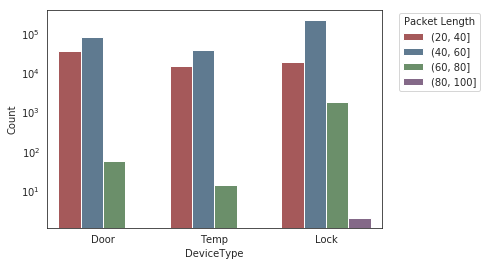

In [62]:
g = sns.countplot(x=df['DeviceType'].str.capitalize(), hue=pd.cut(df['PacketLength'], bins=[20, 40, 60, 80, 100]));
g.set_yscale('log')
plt.legend(loc='upper_right');
plt.legend(title='Packet Length', bbox_to_anchor=(1.05, 0.99), loc=2, borderaxespad=0.);
plt.ylabel('Count')
plt.savefig('Results/Plots/ble-packetlength.png', bbox_inches='tight')

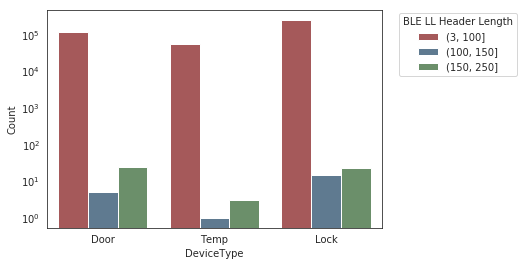

In [63]:
g = sns.countplot(x=df['DeviceType'].str.capitalize(), hue=pd.cut(df['BLE_LL_Length'], bins=[3,100,150,250]));
g.set_yscale('log')
plt.legend(title='BLE LL Header Length', bbox_to_anchor=(1.05, 0.99), loc=2, borderaxespad=0.);
plt.ylabel('Count')
plt.savefig('Results/Plots/ble-blelllength.png', bbox_inches='tight')

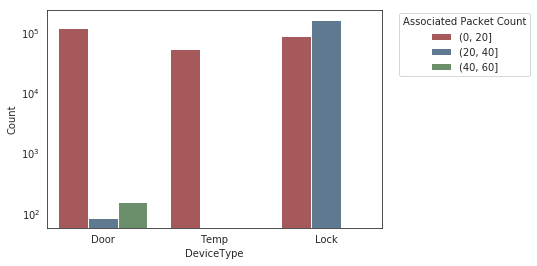

In [64]:
g = sns.countplot(x=df['DeviceType'].str.capitalize(), hue=pd.cut(df['Assoc_Packets'], bins=[0,20,40,60]));
g.set_yscale('log')
plt.legend(title='Associated Packet Count', bbox_to_anchor=(1.05, 0.99), loc=2, borderaxespad=0.);
plt.ylabel('Count')
plt.savefig('Results/Plots/ble-assocpackets.png', bbox_inches='tight')

0     165804
39    133898
12    118819
Name: RFChannel, dtype: int64


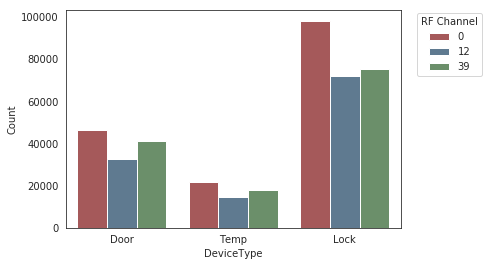

In [65]:
g = sns.countplot(x=df["DeviceType"].str.capitalize(), hue=df["RFChannel"]);
print df['RFChannel'].value_counts()
# g.set_yscale('log')
plt.legend(title='RF Channel', bbox_to_anchor=(1.05, 0.99), loc=2, borderaxespad=0.);
plt.ylabel('Count')
plt.savefig('Results/Plots/ble-rfchannel.png', bbox_inches='tight')

ADV_IND            323515
SCAN_RSP            79045
SCAN_REQ            15530
ADV_NONCONN_IND       373
ADV_DIRECT_IND         45
ADV_SCAN_IND            9
CONNECT_REQ             4
Name: PDUType, dtype: int64


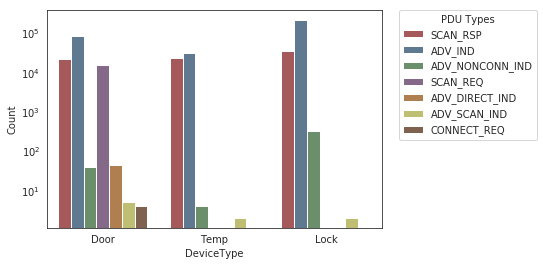

In [66]:
g = sns.countplot(x=df["DeviceType"].str.capitalize(), hue=df["PDUType"], palette=palette);
print df['PDUType'].value_counts()
g.set_yscale('log')
plt.legend(title='PDU Types', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.ylabel('Count')
plt.savefig('Results/Plots/ble-pdutype.png', bbox_inches='tight')